In [1]:
from google_play_scraper import app
from google_play_scraper import Sort, reviews_all, reviews
import pandas as pd
import numpy as np
import string
from transformers import pipeline
import matplotlib.pyplot as plt
import re
from google_play_scraper import search

C:\Users\Ryan Jewik\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Ryan Jewik\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
def string_to_integer(input_str):
    # Remove punctuation from the string
    cleaned_str = input_str.translate(str.maketrans('', '', string.punctuation))
    # Convert the cleaned string to an integer
    try:
        return int(cleaned_str)
    except ValueError:
        raise ValueError("The input string does not contain a valid integer after removing punctuation.")



def clean_filename(filename):
    # Define a regex pattern for characters not allowed in filenames
    invalid_chars = r'[\/:*?"<>|]'
    # Replace invalid characters with an underscore
    cleaned_filename = re.sub(invalid_chars, '_', filename)
    return cleaned_filename



In [3]:
#apple or android toggle
ios = False

In [7]:
#if android
if ios is False:
    appsearch = "clash of clans"
    retrieval_limit = 2000
    #app search
    result = search(
        appsearch,
        lang="en",  # defaults to 'en'
        country="us",  # defaults to 'us'
        n_hits=3  # defaults to 30 (= Google's maximum) we can adjust to how many other recommendations we might want
    )

    appIds = []
    appNames = []
    appIds.append(result[0]['appId'])
    appIds.append(result[1]['appId'])
    appIds.append(result[2]['appId'])
    appNames.append(result[0]['title'])
    appNames.append(result[1]['title'])
    appNames.append(result[2]['title'])

    #first app
    #adds all the reviews to a dataframe
    app1_df = pd.DataFrame()
    result, _ = reviews(
        appIds[0],
        #sleep_milliseconds=0, # defaults to 0
        lang='en', # defaults to 'en'
        country='us', # defaults to 'us'
        sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
        count = retrieval_limit,
        #continuation_token=continuation_token
    )
    for review in result:
        developerResponse = review
        date = review['at']
        userName = review['userName']
        reviewText = review['content']
        score = review['score']
        #can't get title
        #can't get isEdited
        review_df = pd.DataFrame({'developerResponse': [developerResponse],  'date': [date], 'review': [reviewText], 
                                   'score': [score], 'userName': [userName],'name': [appNames[0]]})
        app1_df = pd.concat([app1_df, review_df], ignore_index = True)
    print("First app collected")
    
    #second app
    #adds all the reviews to a dataframe
    app2_df = pd.DataFrame()
    result, _ = reviews(
        appIds[1],
        #sleep_milliseconds=0, # defaults to 0
        lang='en', # defaults to 'en'
        country='us', # defaults to 'us'
        sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
        count = retrieval_limit,
        #continuation_token=continuation_token
    )
    for review in result:
        developerResponse = review
        date = review['at']
        userName = review['userName']
        reviewText = review['content']
        score = review['score']
        #can't get title
        #can't get isEdited
        review_df = pd.DataFrame({'developerResponse': [developerResponse],  'date': [date], 'review': [reviewText], 
                                   'score': [score], 'userName': [userName],'name': [appNames[1]]})
        app2_df = pd.concat([app2_df, review_df], ignore_index = True)
    print("Second app collected")

    #third app
    #adds all the reviews to a dataframe
    app3_df = pd.DataFrame()
    result, _ = reviews(
        appIds[2],
        #sleep_milliseconds=0, # defaults to 0
        lang='en', # defaults to 'en'
        country='us', # defaults to 'us'
        sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
        count = retrieval_limit,
        #continuation_token=continuation_token
    )
    for review in result:
        developerResponse = review
        date = review['at']
        userName = review['userName']
        reviewText = review['content']
        score = review['score']
        #can't get title
        #can't get isEdited
        review_df = pd.DataFrame({'developerResponse': [developerResponse],  'date': [date], 'review': [reviewText], 
                                   'score': [score], 'userName': [userName],'name': [appNames[2]]})
        app3_df = pd.concat([app3_df, review_df], ignore_index = True)
    print("Third app collected")
    

First app collected
Second app collected
Third app collected


In [8]:
#prep reviews
# Example reviews
reviews1 = app1_df['review']
reviews2 = app2_df['review']
reviews3 = app3_df['review']

In [9]:
#model
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

In [10]:
def analyze_app_emotions(reviews, app_name):
    emotions_df = pd.DataFrame()
    skipped_count = 0
    
    for review in reviews:
        try:
            # Get emotions for current review
            emotions = classifier(review)
            
            # Create dictionary mapping labels to scores
            row_data = {'review': review, 'app_name': app_name}
            for emotion in emotions[0]:
                row_data[emotion['label']] = emotion['score']
                
            # Convert to DataFrame row and concatenate
            review_df = pd.DataFrame([row_data])
            emotions_df = pd.concat([emotions_df, review_df], ignore_index=True)
            
        except RuntimeError as e:
            skipped_count += 1
            continue
            
    print(f"Processed {len(emotions_df)} reviews for {app_name}")
    print(f"Skipped {skipped_count} reviews due to length issues")
    
    return emotions_df

# Process all three apps
emotions_df1 = analyze_app_emotions(app1_df['review'], app1_df['name'].iloc[0])
emotions_df2 = analyze_app_emotions(app2_df['review'], app2_df['name'].iloc[0])
emotions_df3 = analyze_app_emotions(app3_df['review'], app3_df['name'].iloc[0])

Processed 400 reviews for Clash of Clans
Skipped 0 reviews due to length issues
Processed 400 reviews for Clash Royale
Skipped 0 reviews due to length issues
Processed 400 reviews for Clash of Lords: Guild Castle
Skipped 0 reviews due to length issues



Top emotions for Clash of Clans:
admiration: 0.4719
neutral: 0.2113
love: 0.0937
approval: 0.0763
joy: 0.0512
annoyance: 0.0354


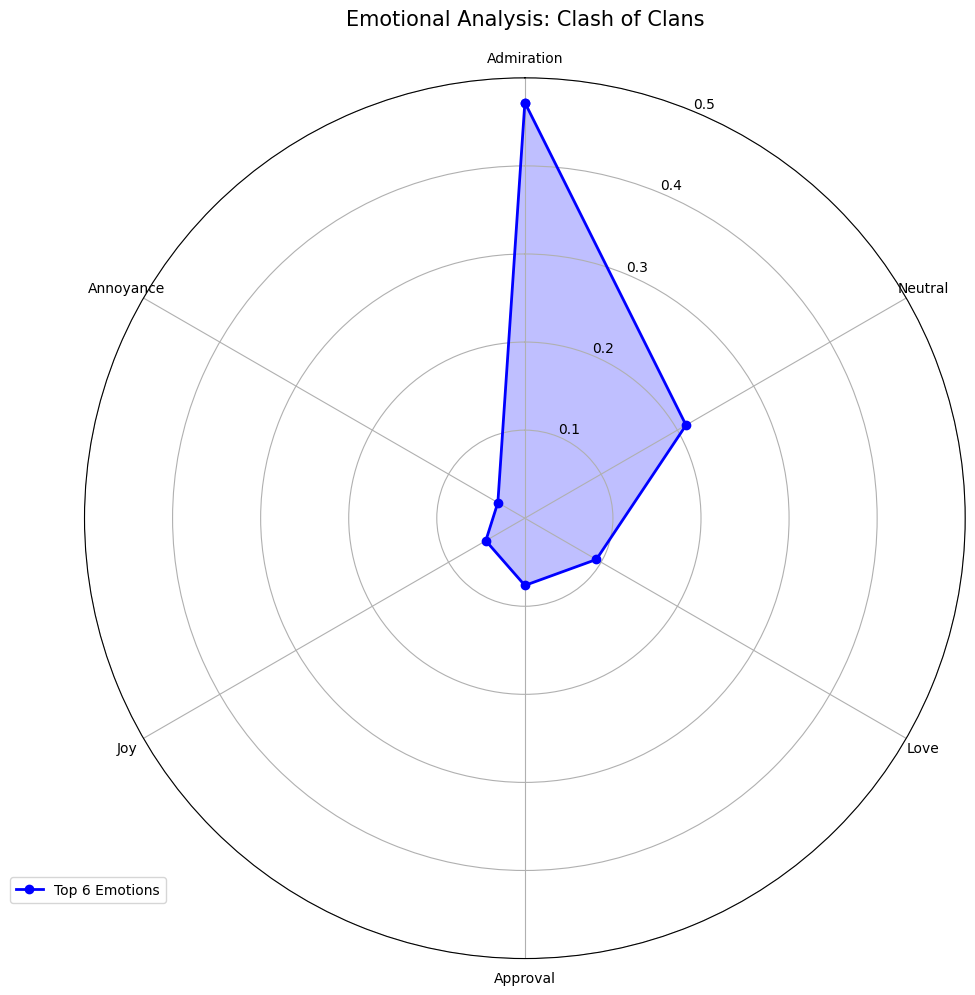


Top emotions for Clash Royale:
neutral: 0.3229
admiration: 0.2335
annoyance: 0.1005
disappointment: 0.0718
approval: 0.0639
disapproval: 0.0626


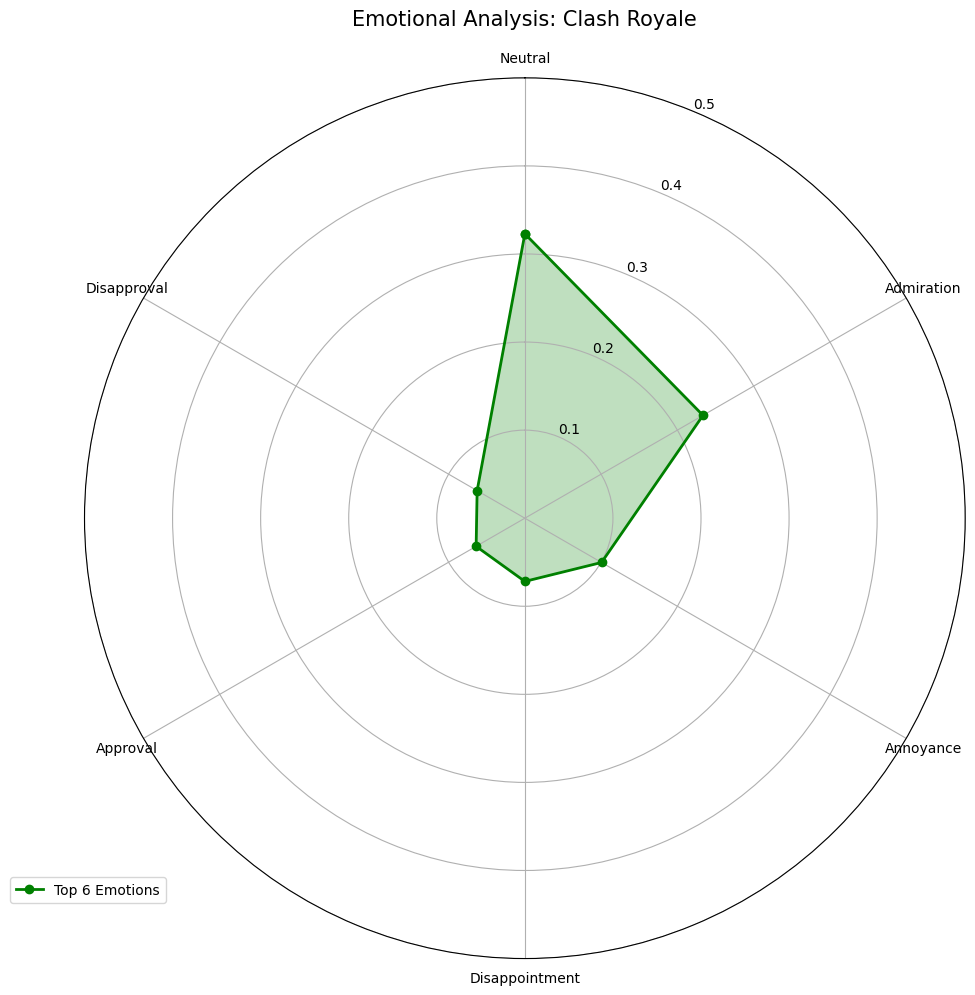


Top emotions for Clash of Lords: Guild Castle:
admiration: 0.3680
neutral: 0.2397
love: 0.0961
approval: 0.0681
joy: 0.0618
annoyance: 0.0476


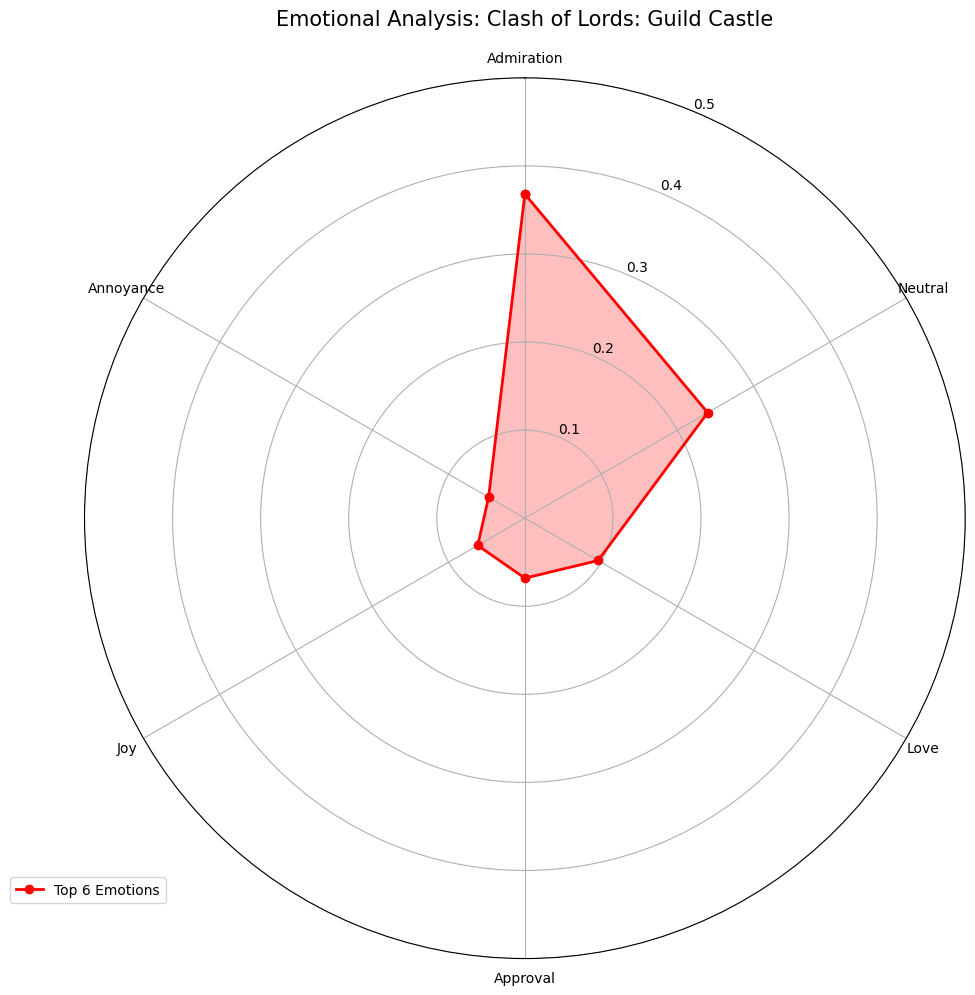

In [11]:
def create_emotion_spider(emotions_df, title_suffix, color='blue'):
    # Calculate means for each emotion column (excluding 'review' and 'app_name' columns)
    emotion_means = emotions_df.drop(['review', 'app_name'], axis=1).mean()
    
    # Sort emotions by mean score and get top 6
    top_emotions = dict(sorted(emotion_means.items(), key=lambda x: x[1], reverse=True)[:6])
    
    # Prepare data
    emotions = [emotion.capitalize() for emotion in top_emotions.keys()]
    values = list(top_emotions.values())
    
    # Setup angles
    num_vars = len(emotions)
    angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
    angles += angles[:1]
    values += values[:1]
    
    # Create plot
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    # Plot data
    ax.plot(angles, values, 'o-', linewidth=2, color=color, label='Top 6 Emotions')
    ax.fill(angles, values, alpha=0.25, color=color)
    
    # Customize chart
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(emotions, size=10)
    ax.set_rgrids([0.1, 0.2, 0.3, 0.4, 0.5])
    
    # Add title and legend
    plt.title(f"Emotional Analysis: {title_suffix}", size=15, y=1.05)
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.tight_layout()
    
    # Print values
    print(f"\nTop emotions for {title_suffix}:")
    for emotion, score in top_emotions.items():
        print(f"{emotion}: {score:.4f}")
    
    plt.show()

# Create three separate plots
create_emotion_spider(emotions_df1, emotions_df1['app_name'].iloc[0], 'blue')
create_emotion_spider(emotions_df2, emotions_df2['app_name'].iloc[0], 'green')
create_emotion_spider(emotions_df3, emotions_df3['app_name'].iloc[0], 'red')